In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

In [14]:
#Inputs
Market_value_val = 400000
Market_value_val /= 10000
Location_val = 3
Asset_val = 500000
Asset_val /= 100
Income_val = 40000
Income_val /= 1000
Interest_val = 3

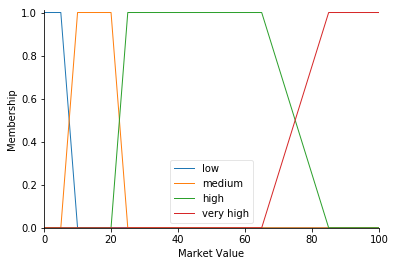

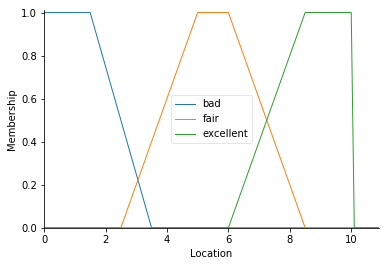

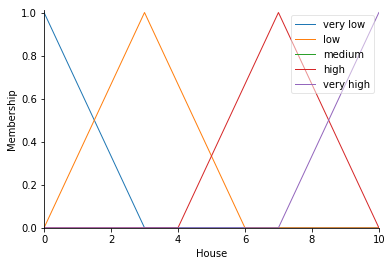

In [44]:
# Home Evaluation
market_value = ctrl.Antecedent(np.arange(0, 101, 1), 'Market Value')
location = ctrl.Antecedent(np.arange(0, 11, 0.1), 'Location')
house = ctrl.Consequent(np.arange(0, 11, 1), 'House')

market_value['low'] = fuzzy.trapmf(market_value.universe, [0, 0, 5,10])
market_value['medium'] = fuzzy.trapmf(market_value.universe, [5, 10, 20, 25])
market_value['high'] = fuzzy.trapmf(market_value.universe, [20, 25, 65,85])
market_value['very high'] = fuzzy.trapmf(market_value.universe, [65,85,100,100])


location['bad'] = fuzzy.trapmf(location.universe, [0, 0, 1.5, 3.5])
location['fair'] = fuzzy.trapmf(location.universe, [2.5, 5, 6, 8.5])
location['excellent'] = fuzzy.trapmf(location.universe, [6, 8.5, 10, 10])

house['very low'] = fuzzy.trimf(house.universe, [0, 0, 3])
house['low'] = fuzzy.trimf(house.universe, [0, 3, 6])
house['medium'] = fuzzy.trimf(house.universe, [20, 25, 65])
house['high'] = fuzzy.trimf(house.universe, [4, 7, 10])
house['very high'] = fuzzy.trimf(house.universe, [7, 10, 10])

house_rule1 = ctrl.Rule(market_value['low'], house['low'])
house_rule2 = ctrl.Rule(location['bad'], house['low'])
house_rule3 = ctrl.Rule(location['bad'] & market_value['low'], house['very low'])
house_rule4 = ctrl.Rule(location['bad'] & market_value['medium'], house['low'])
house_rule5 = ctrl.Rule(location['bad'] & market_value['high'], house['medium'])
house_rule6 = ctrl.Rule(location['bad'] & market_value['very high'], house['high'])
house_rule7 = ctrl.Rule(location['fair'] & market_value['low'], house['low'])
house_rule8 = ctrl.Rule(location['fair'] & market_value['medium'], house['medium'])
house_rule9 = ctrl.Rule(location['fair'] & market_value['high'], house['high'])
house_rule10 = ctrl.Rule(location['fair'] & market_value['very high'], house['very high'])
house_rule11 = ctrl.Rule(location['excellent'] & market_value['low'], house['medium'])
house_rule12 = ctrl.Rule(location['excellent'] & market_value['medium'], house['high'])
house_rule13 = ctrl.Rule(location['excellent'] & market_value['high'], house['very high'])
house_rule14 = ctrl.Rule(location['excellent'] & market_value['very high'], house['very high'])

house_ctrl = ctrl.ControlSystem([house_rule1, house_rule2, house_rule3, house_rule4, house_rule5, house_rule6, house_rule7, house_rule8, house_rule9, house_rule10, house_rule11, house_rule12, house_rule13, house_rule14])
house_model = ctrl.ControlSystemSimulation(house_ctrl)
house_model.input['Market Value'] = Market_value_val
house_model.input['Location'] = Location_val
house_model.compute()
# print(house_model.output['House'])
market_value.view()
location.view()
house.view()

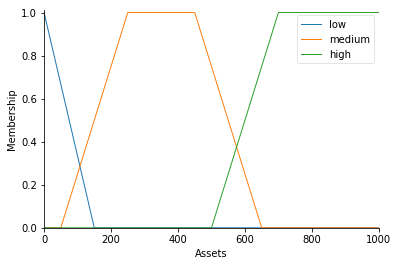

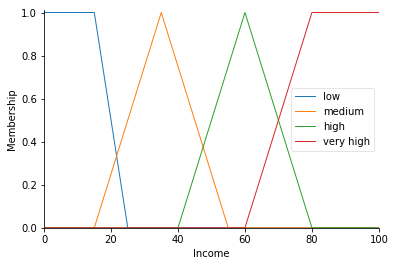

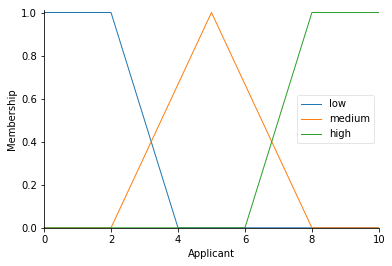

In [30]:
# Applicant Evaluation

assets = ctrl.Antecedent(np.arange(0, 1001, 1), 'Assets')
income = ctrl.Antecedent(np.arange(0, 101, 1), 'Income')
applicant = ctrl.Consequent(np.arange(0, 11, 1), 'Applicant')

assets['low'] = fuzzy.trapmf(assets.universe, [0, 0, 0, 150])
assets['medium'] = fuzzy.trapmf(assets.universe, [50, 250, 450, 650])
assets['high'] = fuzzy.trapmf(assets.universe, [500, 700, 1000,1000])


income['low'] = fuzzy.trapmf(income.universe, [0, 0, 15, 25])
income['medium'] = fuzzy.trapmf(income.universe, [15, 35, 35, 55])
income['high'] = fuzzy.trapmf(income.universe, [40, 60, 60, 80])
income['very high'] = fuzzy.trapmf(income.universe, [60, 80, 100, 100])

applicant['low'] = fuzzy.trapmf(applicant.universe, [0, 0, 2, 4])
applicant['medium'] = fuzzy.trapmf(applicant.universe, [2, 5, 5, 8])
applicant['high'] = fuzzy.trapmf(applicant.universe, [6, 8, 10, 10])

applicant_rule1 = ctrl.Rule(assets['low'] & income['low'], applicant['low'])
applicant_rule2 = ctrl.Rule(assets['low'] & income['medium'], applicant['low'])
applicant_rule3 = ctrl.Rule(assets['low'] & income['high'], applicant['medium'])
applicant_rule4 = ctrl.Rule(assets['low'] & income['very high'], applicant['high'])
applicant_rule5 = ctrl.Rule(assets['medium'] & income['low'], applicant['low'])
applicant_rule6 = ctrl.Rule(assets['medium'] & income['medium'], applicant['medium'])
applicant_rule7 = ctrl.Rule(assets['medium'] & income['high'], applicant['high'])
applicant_rule8 = ctrl.Rule(assets['medium'] & income['very high'], applicant['high'])
applicant_rule9 = ctrl.Rule(assets['high'] & income['low'], applicant['medium'])
applicant_rule10 = ctrl.Rule(assets['high'] & income['medium'], applicant['medium'])
applicant_rule11 = ctrl.Rule(assets['high'] & income['high'], applicant['high'])
applicant_rule12 = ctrl.Rule(assets['high'] & income['very high'], applicant['high'])


applicant_ctrl = ctrl.ControlSystem([applicant_rule1, applicant_rule2, applicant_rule3, applicant_rule4, applicant_rule5, applicant_rule6, applicant_rule7, applicant_rule8, applicant_rule9, applicant_rule10, applicant_rule11, applicant_rule12])
applicant_model = ctrl.ControlSystemSimulation(applicant_ctrl)
applicant_model.input['Assets'] = Asset_val
applicant_model.input['Income'] = Income_val
applicant_model.compute()
assets.view()
income.view()
applicant.view()

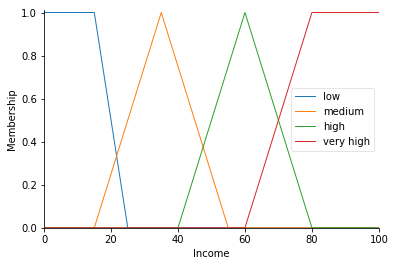

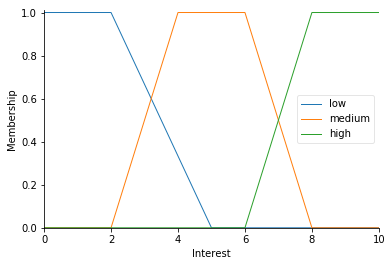

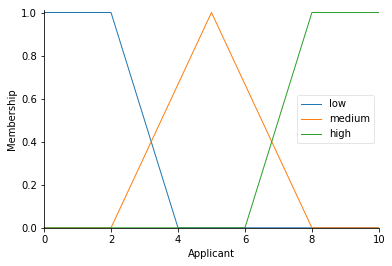

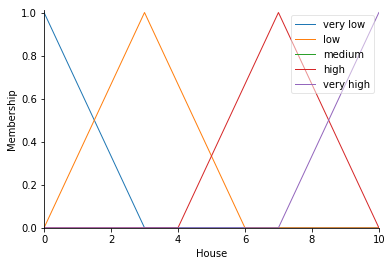

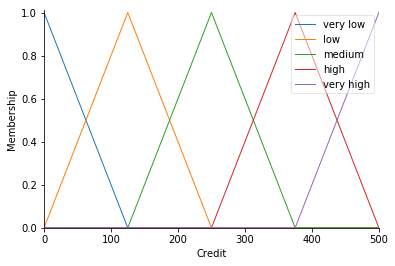

In [31]:
# Credit Evaluation

_income = ctrl.Antecedent(np.arange(0, 101, 1), 'Income')
_applicant = ctrl.Antecedent(np.arange(0, 11, 1), 'Applicant')
_house = ctrl.Antecedent(np.arange(0, 11, 1), 'House')
interest = ctrl.Antecedent(np.arange(0, 11, 1), 'Interest')
credit = ctrl.Consequent(np.arange(0, 501, 1), 'Credit')

_house['very low'] = fuzzy.trimf(_house.universe, [0, 0, 3])
_house['low'] = fuzzy.trimf(_house.universe, [0, 3, 6])
_house['medium'] = fuzzy.trimf(_house.universe, [20, 25, 65])
_house['high'] = fuzzy.trimf(_house.universe, [4, 7, 10])
_house['very high'] = fuzzy.trimf(_house.universe, [7, 10, 10])

_income['low'] = fuzzy.trapmf(_income.universe, [0, 0, 15, 25])
_income['medium'] = fuzzy.trapmf(_income.universe, [15, 35, 35, 55])
_income['high'] = fuzzy.trapmf(_income.universe, [40, 60, 60, 80])
_income['very high'] = fuzzy.trapmf(_income.universe, [60, 80, 100, 100])

_applicant['low'] = fuzzy.trapmf(_applicant.universe, [0, 0, 2, 4])
_applicant['medium'] = fuzzy.trapmf(_applicant.universe, [2, 5, 5, 8])
_applicant['high'] = fuzzy.trapmf(_applicant.universe, [6, 8, 10, 10])

interest['low'] = fuzzy.trapmf(interest.universe, [0, 0, 2, 5])
interest['medium'] = fuzzy.trapmf(interest.universe, [2, 4, 6, 8])
interest['high'] = fuzzy.trapmf(interest.universe, [6, 8, 10, 10])

credit['very low'] = fuzzy.trimf(credit.universe, [0, 0, 125])
credit['low'] = fuzzy.trimf(credit.universe, [0, 125, 250])
credit['medium'] = fuzzy.trimf(credit.universe, [125, 250, 375])
credit['high'] = fuzzy.trimf(credit.universe, [250, 375, 500])
credit['very high'] = fuzzy.trimf(credit.universe, [375, 500, 500])

credit_rule1 = ctrl.Rule(_income['low'] & interest['medium'], credit['very low'])
credit_rule2 = ctrl.Rule(_income['low'] & interest['high'], credit['very low'])
credit_rule3 = ctrl.Rule(_income['medium'] & interest['high'], credit['low'])
credit_rule4 = ctrl.Rule(_applicant['low'], credit['very low'])
credit_rule5 = ctrl.Rule(_house['very low'], credit['very low'])
credit_rule6 = ctrl.Rule(_applicant['medium'] & _house['very low'], credit['low'])
credit_rule7 = ctrl.Rule(_applicant['medium'] & _house['low'], credit['low'])
credit_rule8 = ctrl.Rule(_applicant['medium'] & _house['medium'], credit['medium'])
credit_rule9 = ctrl.Rule(_applicant['medium'] & _house['high'], credit['high'])
credit_rule10 = ctrl.Rule(_applicant['medium'] & _house['very high'], credit['high'])
credit_rule11 = ctrl.Rule(_applicant['high'] & _house['very low'], credit['low'])
credit_rule12 = ctrl.Rule(_applicant['high'] & _house['low'], credit['medium'])
credit_rule13 = ctrl.Rule(_applicant['high'] & _house['medium'], credit['high'])
credit_rule14 = ctrl.Rule(_applicant['high'] & _house['high'], credit['high'])
credit_rule15 = ctrl.Rule(_applicant['high'] & _house['very high'], credit['very high'])


credit_ctrl = ctrl.ControlSystem([credit_rule1, credit_rule2, credit_rule3, credit_rule4, credit_rule5, credit_rule6, credit_rule7, credit_rule8, credit_rule9, credit_rule10, credit_rule11, credit_rule12, credit_rule13, credit_rule14, credit_rule15])
credit_model = ctrl.ControlSystemSimulation(credit_ctrl)
income.view()
interest.view()
applicant.view()
house.view()
credit.view()



In [43]:
credit_model.input['Income'] = Income_val
credit_model.input['Interest'] = Interest_val
credit_model.input['Applicant'] = applicant_model.output['Applicant']
credit_model.input['House'] = house_model.output['House']

credit_model.compute()
print(credit_model.output['Credit'] * 1000)

228331.39343847538
